In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Graficar
from matplotlib import cm #Manejar colores
import matplotlib.patches as mpatches # Hacer elipses
from matplotlib.collections import PatchCollection
import gudhi # Filtración de complejos simpliciales de Rips y Alpha
from scipy.spatial.distance import squareform, pdist #Calcular matrices de distancias y hacer inferencias de los parámetros

# Base de Datos 3

## Rips

In [2]:
db = pd.read_csv("Activity3.csv")

In [3]:
a = db["0"].values
b = db["1"].values

        a      b
0  -16.87  -9.03
1  -17.72   9.60
2  -19.05   8.23
3  -10.25  -8.93
4  -17.64 -10.59
..    ...    ...
95  -4.37  -2.76
96   0.84  -0.33
97   3.04  -1.23
98   3.31  -2.05
99  -4.61  -2.94

[100 rows x 2 columns]


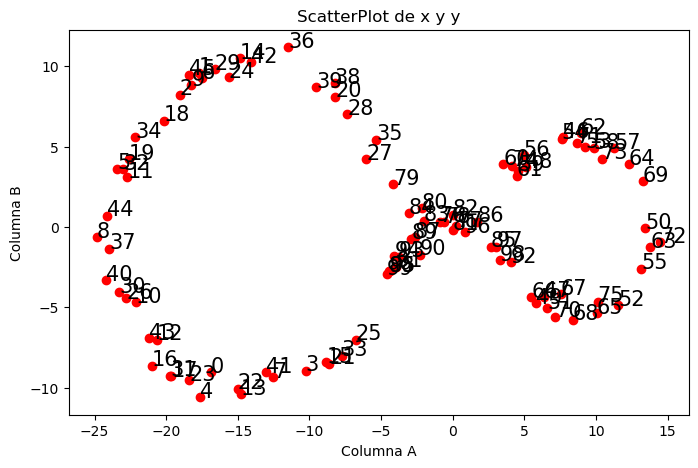

In [5]:
#a = [1,7,4,9,0,2,9]
#b = [1,0,6,6,14,19,17]

#point = ['P1','P2','P3','P4','P5','P6','P7']
data = pd.DataFrame({'a':np.round(a,2), 'b':np.round(b,2)})
#data = data.set_index('Point')
print(data)

#graficamos
plt.figure(figsize=(8,5))
plt.scatter(data['a'], data['b'], c='r', marker='o')
plt.xlabel('Columna A')
plt.ylabel('Columna B')
plt.title('ScatterPlot de x y y')

for j in data.itertuples():
    plt.annotate(j.Index, (j.a, j.b), fontsize=15)

Es posible ver que los datos forman dos círculos que asemejan un infinito, pero se hace el proceso adecuado para terminar el análisis. 

In [8]:
#calculamos la matriz de Distancias Euclidianas

dist = pd.DataFrame(squareform(pdist(data[["a", "b"]]), "euclidean"), columns=data.index.values, index=data.index.values)
dist

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,18.649381,17.397126,6.620755,1.739684,14.254056,18.301904,4.321134,11.564830,17.883325,...,16.296469,14.503441,22.003422,14.934664,14.695863,13.984381,19.731551,21.383360,21.353051,13.689255
1,18.649381,0.000000,1.909398,19.979034,20.190158,8.254144,0.389487,19.630313,12.480260,0.959635,...,19.134924,18.312073,24.744009,18.033225,17.790745,18.193188,21.049430,23.415091,24.041285,18.141767
2,17.397126,1.909398,0.000000,19.284854,18.872745,6.344833,1.836110,18.730323,10.600873,0.982293,...,19.487537,18.509138,25.328170,18.291468,18.033358,18.338007,21.653769,24.030391,24.609917,18.256026
3,6.620755,19.979034,19.284854,0.000000,7.574147,18.198970,19.592715,2.346103,16.775771,19.451296,...,10.725787,9.037533,15.804006,9.598385,9.427980,8.523104,14.033820,15.359495,15.205525,8.227375
4,1.739684,20.190158,18.872745,7.574147,0.000000,15.349814,19.850305,5.231529,12.273695,19.399593,...,17.714830,15.930691,23.254043,16.390915,16.162713,15.407849,21.137124,22.699604,22.623751,15.109712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13.984381,18.193188,18.338007,8.523104,15.407849,20.093148,17.823187,10.505832,20.578460,18.063444,...,2.312099,0.524309,8.429976,1.092932,0.996243,0.000000,5.748826,7.566307,7.712749,0.300000
96,19.731551,21.049430,21.653769,14.033820,21.137124,24.581074,20.722572,16.147449,25.681994,21.160931,...,3.437965,5.233097,3.696282,4.860504,5.128206,5.748826,0.000000,2.376973,3.009867,6.042731
97,21.383360,23.415091,24.030391,15.359495,22.699604,26.902624,23.090366,17.582153,27.886032,23.534337,...,5.363357,7.087545,1.379311,6.847226,7.133618,7.566307,2.376973,0.000000,0.863308,7.838788
98,21.353051,24.041285,24.609917,15.205525,22.623751,27.326824,23.711215,17.464278,28.184792,24.136199,...,5.619119,7.261584,0.741485,7.093109,7.383901,7.712749,3.009867,0.863308,0.000000,7.969849


Vemos que el diametro de la base de datos nunca aumenta de 25. Por lo tanto se acota el parametro r en el complejo simplicial de Rips a 252 y con esto garantizamos que el ultimo complejo simplical será el que conecta a todos. 

In [10]:
#Calculamos la filtración de Rips con un raadio de 20
rips_complex = gudhi.RipsComplex(points=[list(point) for point in zip(a, b)], max_edge_length=25.0)

In [11]:
#Generamos el arbol de complejos simpliciales e imprimmos la información
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
        repr(simplex_tree.num_vertices()) + 'vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Rips complex is of dimension 2 - 99024 simplices - 100vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[35] -> 0.00
[36] -> 0.00
[37] -> 0.00
[38] -> 0.00
[39] -> 0.00
[40] -> 0.00
[41] -> 0.00
[42] -> 0.00
[43] -> 0.00
[44] -> 0.00
[45] -> 0.00
[46] -> 0.00
[47] -> 0.00
[48] -> 0.00
[49] -> 0.00
[50] -> 0.00
[51] -> 0.00
[52] -> 0.00
[53] -> 0.00
[54] -> 0.00
[55] -> 0.00
[56] -> 0.00
[57] -> 0.00
[58] -> 0.00
[59] -> 0.00
[60] -> 0.00
[61] -> 0.00
[62] -> 0.00
[63] -> 0.00
[64] -> 0.00
[65] -> 0.00
[66] -> 0.00
[67] -> 0.00
[68] -> 0.00
[69] -> 0.00
[70] -> 0.00
[71] -> 0.00
[72] -> 0.

La siguiente función ayuda a realizar una gráfica

In [12]:
def plot_rips_complex(data, R, label="data", col=1, maxdim=2):
    tab10 = cm.get_cmap('tab10')

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(label)
    ax.scatter(
        data[:, 0], data[:, 1], label=label,
        s=8, alpha=0.9, c=np.array(tab10([col] * len(data)))
    )

    for xy in data:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.2))

    for i, xy in enumerate(data):
        if maxdim >=1:
            for j in range(i + 1, len(data)):
                pq = data[j]
                if (xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
                    pts = np.array([xy, pq])
                    ax.plot(pts[:, 0], pts[:, 1], color=tab10(col), alpha=0.6, linewidth=1)
                if maxdim == 2:
                    for k in range(j + 1, len(data)):
                        ab = data[k]
                        if ((ab != pq).all()
                                and (np.linalg.norm(xy - pq) <= R)
                                and (np.linalg.norm(xy - ab) <= R)
                                and (np.linalg.norm(pq - ab) <= R)
                        ):
                            pts = np.array([xy, pq, ab])
                            ax.fill(pts[:, 0], pts[:, 1], facecolor=tab10(col), alpha=0.1)
                        pass

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    pass

### Complejo Simplicial Radio 5

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_46462/2475964212.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


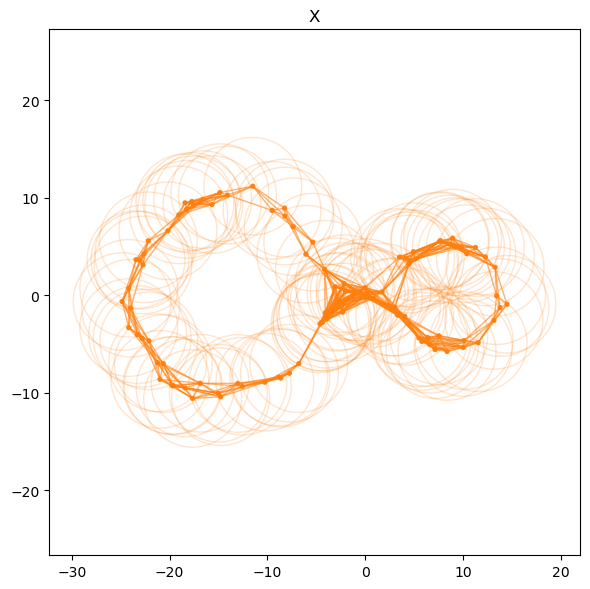

In [17]:
X = np.column_stack((a, b))
plot_rips_complex(X, R=5, label="X", maxdim=1)

### Complejo Simplicial Radio 10

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_46462/2475964212.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


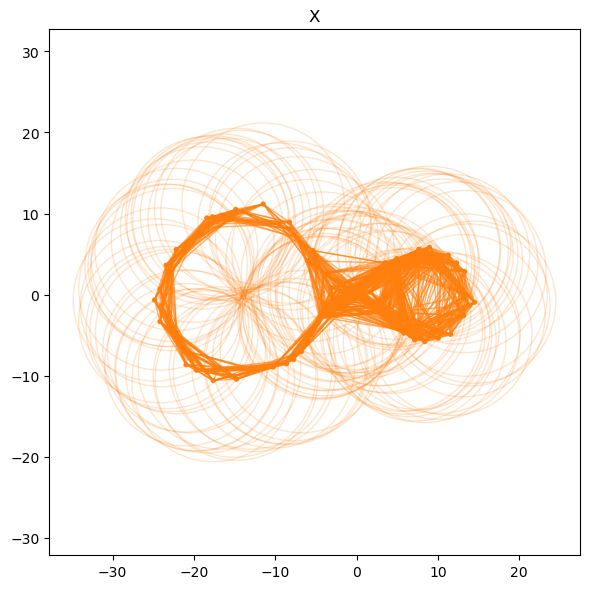

In [18]:
X = np.column_stack((a, b))
plot_rips_complex(X, R=10, label="X", maxdim=1)

### Complejo Simplicial Radio 2

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_46462/2475964212.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


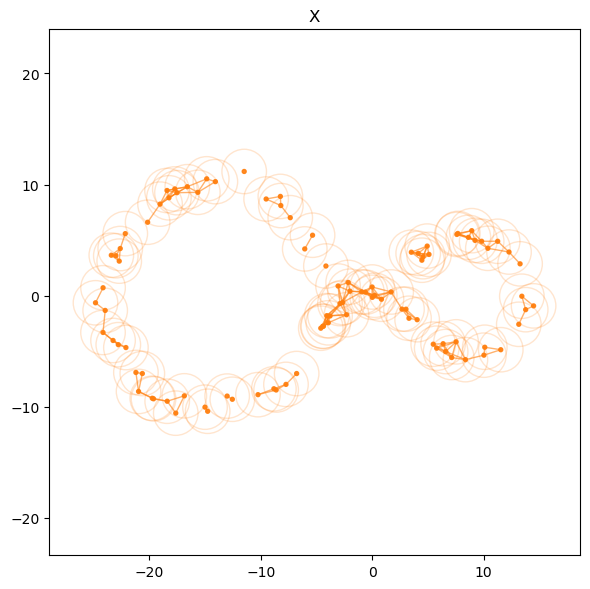

In [19]:
X = np.column_stack((a, b))
plot_rips_complex(X, R=2, label="X", maxdim=1)

### Complejo Simplicial Radio 0.5

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_46462/2475964212.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


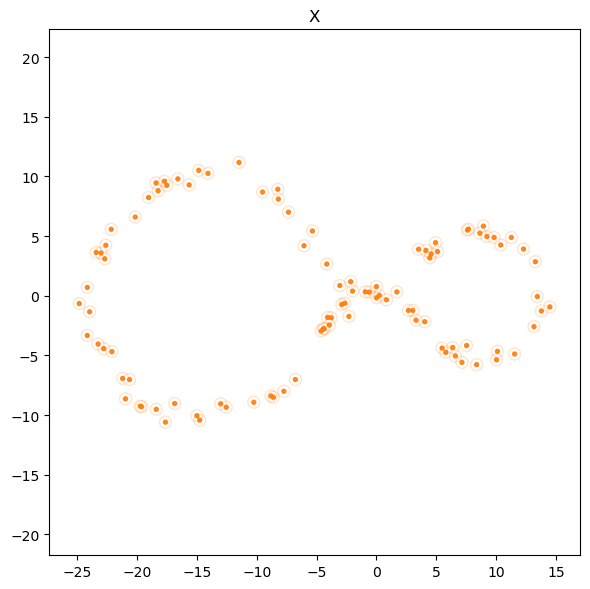

In [20]:
X = np.column_stack((a, b))
plot_rips_complex(X, R=0.5, label="X", maxdim=1)

## Alpha

In [23]:
points = np.column_stack((a, b))

alpha_complex = gudhi.AlphaComplex(points=[list(point) for point in zip(a, b)])

In [24]:
#Generamos el arbol de complejos simpliciales e imprimmos la información
simplex_tree = alpha_complex.create_simplex_tree()
result_str = 'Alpha complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
        repr(simplex_tree.num_vertices()) + 'vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex is of dimension 2 - 559 simplices - 100vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[35] -> 0.00
[36] -> 0.00
[37] -> 0.00
[38] -> 0.00
[39] -> 0.00
[40] -> 0.00
[41] -> 0.00
[42] -> 0.00
[43] -> 0.00
[44] -> 0.00
[45] -> 0.00
[46] -> 0.00
[47] -> 0.00
[48] -> 0.00
[49] -> 0.00
[50] -> 0.00
[51] -> 0.00
[52] -> 0.00
[53] -> 0.00
[54] -> 0.00
[55] -> 0.00
[56] -> 0.00
[57] -> 0.00
[58] -> 0.00
[59] -> 0.00
[60] -> 0.00
[61] -> 0.00
[62] -> 0.00
[63] -> 0.00
[64] -> 0.00
[65] -> 0.00
[66] -> 0.00
[67] -> 0.00
[68] -> 0.00
[69] -> 0.00
[70] -> 0.00
[71] -> 0.00
[72] -> 0.0